## 1-Importing Data and Exploring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2- Elbow Method To Find Number of Clusters 

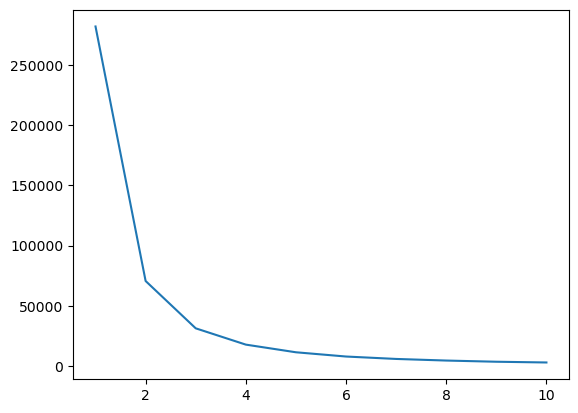

In [8]:
from sklearn.cluster import KMeans

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

wc = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=200,
                n_init=10,
                random_state=42
               )
    km.fit(X)
    wc.append(km.inertia_)
    
plt.plot(range(1,11), wc)

> From Elbow method clusters num could be 3

## 3- Training The Model

In [9]:
model = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=200,
    n_init=10,
    random_state=42
)

y_predict = model.fit_predict(X)

In [41]:
print(model.cluster_centers_)
y_predict

[[125.5     6.588   2.974   5.552   2.026]
 [ 25.5     5.006   3.418   1.464   0.244]
 [ 75.5     5.936   2.77    4.26    1.326]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## 4- Plotting The Clusters

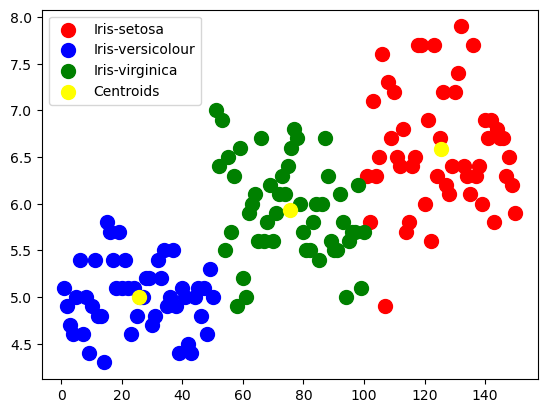

In [51]:
plt.scatter(X.iloc[y_predict == 0, 0], X.iloc[y_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X.iloc[y_predict == 1, 0], X.iloc[y_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X.iloc[y_predict == 2, 0], X.iloc[y_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()